In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
#                                AutoMinorLocator)
%matplotlib inline
plt.style.use('~/.config/matplotlib/stylelib/paper.mplstyle')
twopi = 2.*np.pi

In [2]:
def Lambda(block):
    # Each block is list of angles in range [0,1]
    twopi = 2.*np.pi
    block = [twopi*t for t in block]
    S,T = 0.,0.
    for th in block:
        S += np.cos(2.*th)
        T += np.sin(2.*th)
        
    S /= len(block)
    T /= len(block)
    
    return np.sqrt(S*S + T*T)

/home/walterms/jupyter_py2/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


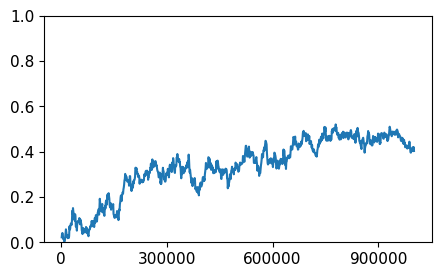

In [3]:
# imgname = "spiral_e15.00_n70_th0.00"
# imgnames = ["T","T_lrg","U","U_lrg","V","V_lrg","W","W_lrg","O","O_lrg","H","H_lrg"]
imgnames = ["Q","Q_lrg"]
paramdir = "/home/walterms/project/walterms/circ_mcmd/params/"
# paramfile = "/home/walterms/project/walterms/circ_mcmd/params/spiral_e17.00_n70_th0.00.param"
source_dir = "/home/walterms/project/walterms/circ_mcmd/output/"
savedir = "/home/walterms/project/walterms/circ_mcmd/plots/"

f = plt.figure();
plt.ylim(0,1.0)

for imgname in imgnames:
    f.clf()
    
    sweepeval = 1
    fpar = open(paramdir+imgname+".param",'r')
    for l in fpar:
        spt = l.split()
        if spt[0] == "sweepEval":
            ss = spt[2].rstrip(";")
            sweepeval = int(ss)
    fpar.close()

    nskip = 2
    halfL = 1.0/2

    # Count num blocks
    Nblock = 0
    dfile = open(source_dir+imgname, "r")
    for line in dfile.readlines():
        if line == "\n": Nblock+=1
    dfile.seek(0)

    if not (dfile.readline()[0].isalpha()): dfile.seek(0)
    cntSnap = 0
    sweeps = []
    Ls = []
    block = []
    for line in dfile.readlines():
        if cntSnap < nskip:
            if line =="\n": cntSnap+=1
            continue
        if line == "\n":
            Ls.append(Lambda(block))
            sweeps.append(cntSnap*sweepeval)
            block = []
            cntSnap+=1

            continue
        l = [float(x) for x in line.split()]
        th = l[4]
        block.append(th/twopi)

    dfile.close()

    plt.ylim(0,1.0)
    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(4))
    plt.plot(sweeps,Ls)
    f.savefig(savedir+imgname+"_lambda.pdf")